Kiley Delaney/kileyfd2/675040797
CS 598 Advanced Bayesian Modeling Assignment 2

In [100]:
#!apt-get install -y jags

In [101]:
install.packages("rjags")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Problem 1

(a) The first prior formulation was

$θ_j$ | $α, β \sim$ Beta($α, β$)

$α, β \sim$ Expon(0.001)


(i)  Independently simulate 1000 pairs (α, β) from their hyperprior, and
produce a scatterplot of log(β) versus log(α).

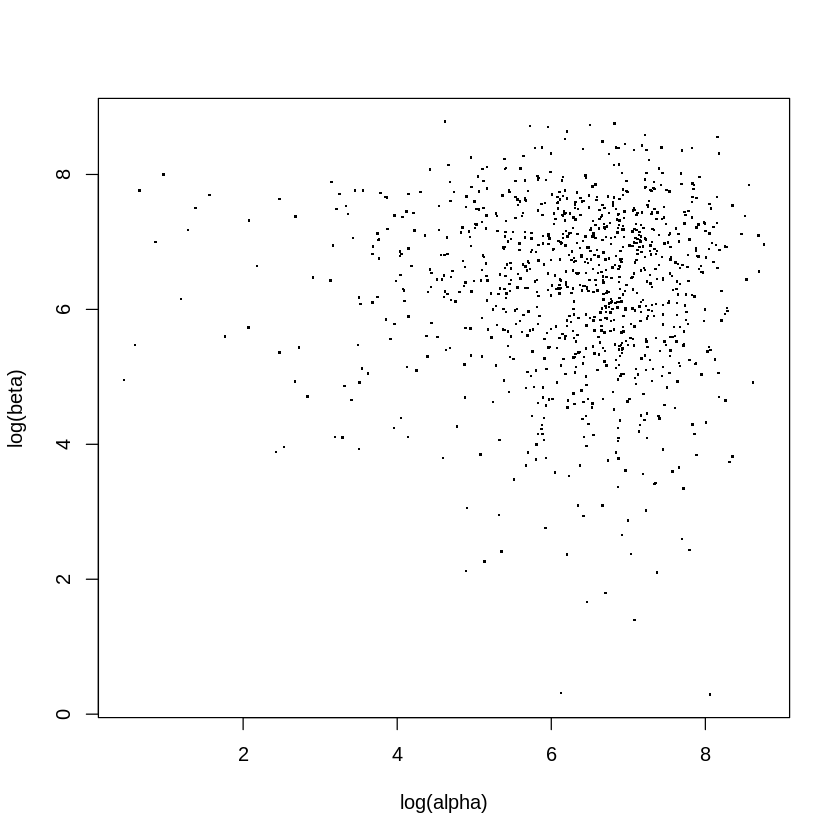

In [102]:
alpha <- rexp(n = 1000, rate =0.001)
beta <- rexp(n = 1000, rate =0.001)
plot(log(alpha), log(beta), pch=".", cex=2)

(ii) Using the simulated pairs (α, β), forward-simulate $θ_1$, and produce a
histogram of the result (an approximation of its marginal prior).

In [103]:
theta_one <- rbeta(1000, alpha, beta)

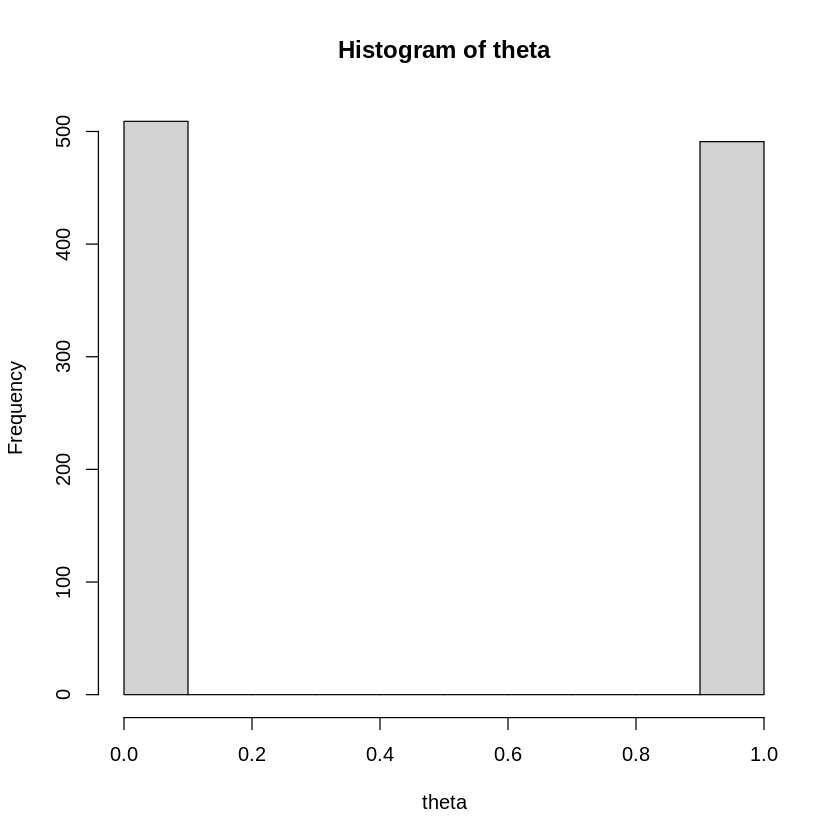

In [104]:
hist(theta)

(b) The second prior formulation was

$θ_j$ | $α, β \sim$ Beta($α, β$)

$α$ = $ φ_1 /  φ_2^2$

$β$ = $ (1 - φ_1) /  φ_2^2$

$φ_1 \sim$ U(0,1)

$φ_2 \sim$ Expon(0.001)


(i) Independently simulate 1000 pairs (α, β) from their hyperprior, and produce a scatterplot of log(β) versus log(α).

In [105]:
sig_one <- runif(n=1000, 0, 1)
sig_two <- rexp(n = 1000, rate =0.001)
alpha <- sig_one / (sig_two ^ 2)
beta <- (1 - sig_one) / (sig_two ^ 2)

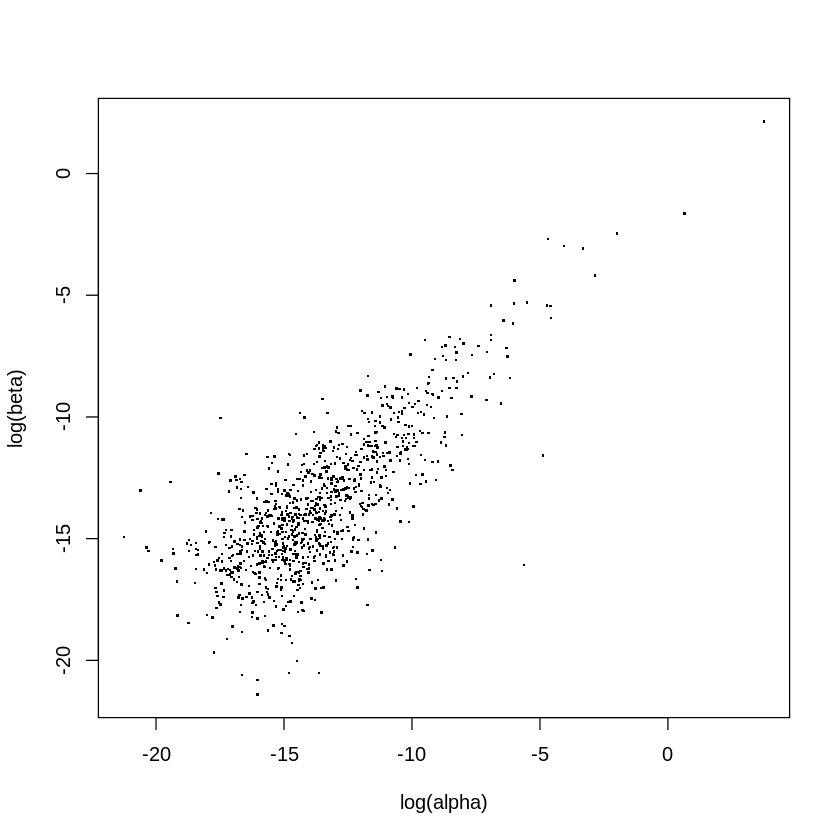

In [106]:
plot(log(alpha), log(beta), pch=".", cex=2)

(ii)  Using the simulated pairs (α, β), forward-simulate $θ_1$, and produce a histogram of the result (an approximation of its marginal prior).

In [107]:
theta_one <- rbeta(1000, alpha, beta)

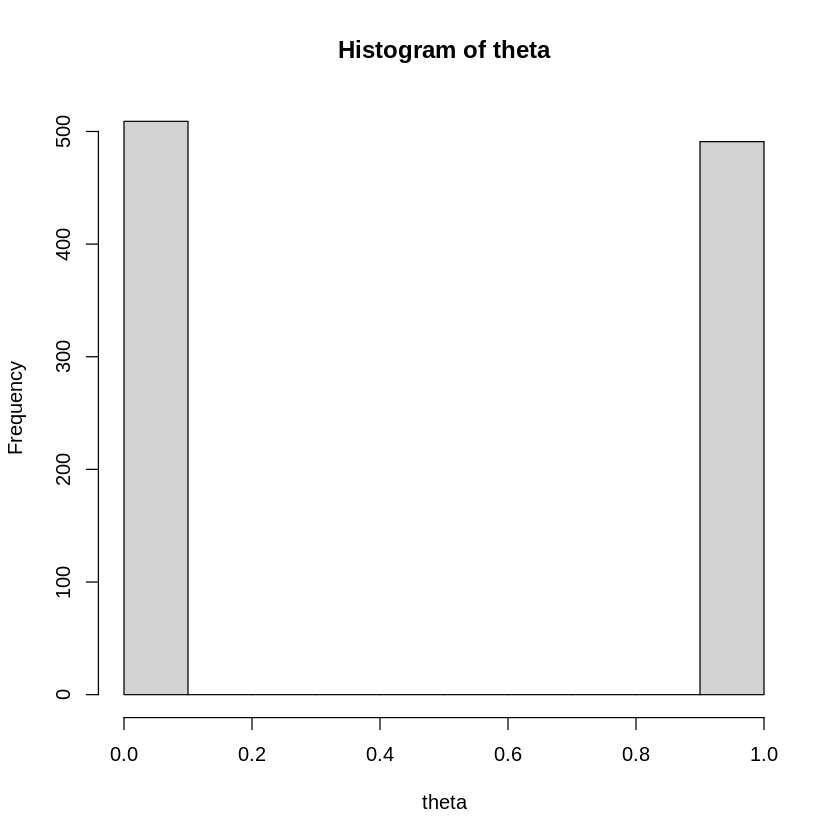

In [108]:
hist(theta)

# Problem 2

(a) Specify improper densities that the proper hyperpriors given above are
apparently intended to approximate. (Which parameters are the hyperparameters?)

The hyperparameters are as follows:

$ψ_0 ∼ $ N($0, 1000^2$)

$\sigma_0 ∼ $ U($0, 1000$)

(b) Draw a directed acyclic graph (DAG) appropriate for this model. (Use the
notation introduced in lecture, including “plates.”) You may draw it neatly by hand or use software.

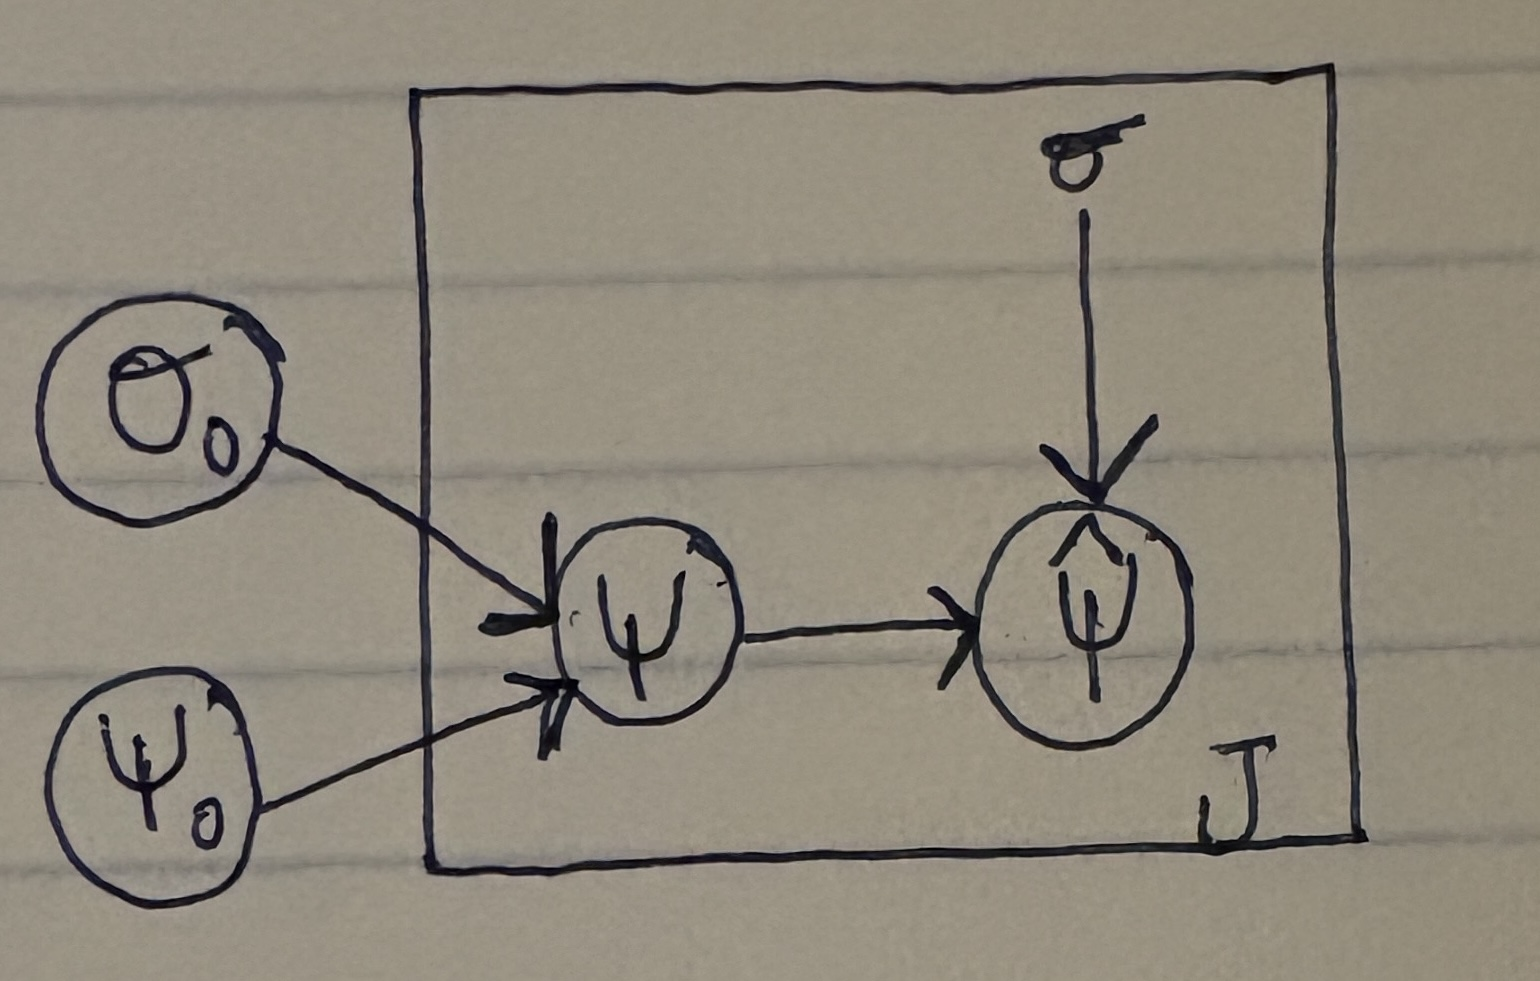

(c) Using the template asgn2template.bug provided on the course website, form a
JAGS model statement (consistent with your DAG). Show your JAGS code.
[Remember: JAGS “dnorm” uses precisions, not variance]

In [109]:
library(rjags)

In [110]:
'model {
  for (j in 1:12) {
    psihat[j] ~ dnorm(psi[j], 1/sigma[j]^2)
    psi[j] ~ dnorm(psi0, 1/sigma0^2)
  }

  psi0 ~ dnorm(0,1/1000^2)
  sigma0 ~ dunif(0,1000)

  sigmasq0 <- sigma0^2
}'

[1] "model {\n  for (j in 1:12) {\n    psihat[j] ~ dnorm(psi[j], 1/sigma[j]^2)\n    psi[j] ~ dnorm(psi0, 1/sigma0^2)\n  }\n\n  psi0 ~ dnorm(0,1/1000^2)\n  sigma0 ~ dunif(0,1000)\n\n  sigmasq0 <- sigma0^2\n}"

(d) Set up any R (rjags) statements appropriate for creating a JAGS model. Show
your R code, and also show (print) the R list or data frame that you are passing to JAGS. Double check that the variable names in the list or data frame exactly match the corresponding names in your JAGS model, and double check your numbers.

In [111]:
data <- read.table("numbersdata.txt", header=FALSE)
colnames(data) <- c("psi", "sigma")

In [112]:
data

psi,sigma
<dbl>,<dbl>
1.055,0.373
-0.097,0.116
0.626,0.229
0.017,0.117
1.068,0.471
-0.025,0.120
-0.117,0.220
-0.381,0.239
0.507,0.186


In [113]:
model1 <- jags.model("filledtemplate.bug", data)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 12
   Unobserved stochastic nodes: 14
   Total graph size: 70

Initializing model



(e) Run at least 10,000 iterations of burn-in, then 100,000 iterations to use for inference. For both $ψ_0$ and $σ^2_0$ (not $σ_0$), produce a posterior numerical summary and also graphical estimates of the posterior densities. Explicitly give the approximations of their posterior expected values, posterior standard deviations, and 95% central posterior intervals. (Just showing R output is not enough!)

In [114]:
update(model1, 10000)

In [115]:
iterations = coda.samples(model1, c("psi0","sigmasq0","psi"), n.iter=100000)

In [116]:
psi0<- as.matrix(iterations)[,"psi0"]
sigmasq0<- as.matrix(iterations)[,"sigmasq0"]

In [117]:
summary(psi0)
summary(sigmasq0)
psi0_mean=mean(psi0)
sigmasq0_mean=mean(sigmasq0)
psi0_sd=sd(psi0)
sigmasq0_sd=sd(sigmasq0)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.8410  0.1881  0.2863  0.2873  0.3860  1.4378 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.05401 0.19064 0.25535 0.29759 0.35343 4.01903 

The posterior expected values are approximately 0.2867 for $Ψ$ and approximately  0.2999 for $σ$.

In [118]:
psi0_mean
sigmasq0_mean

[1] 0.2873474

[1] 0.2975855

The posterior standard deviations are approximately 0.1583 for $Ψ$ and approximately  0.1769 for $σ$.

In [119]:
psi0_sd
sigmasq0_sd

[1] 0.1575065

[1] 0.1692241

The 95% cenral posterior interval for $Ψ$ is approximately (0.2857, 0.2877). The 95% central posterior interval for $σ$ is approximately (0.2988, 0.3010).

In [120]:
confidenceintervalhelper <- function(n, sd , mean){

    error <- qnorm(0.975)* sd/sqrt(n)
    left <- mean - error
    right <- mean + error
    confidenceinterval <- list(left,right)
    return (confidenceinterval)
}

psi0_CI = confidenceintervalhelper(100000, psi0_sd, psi0_mean)
sigmasq0_CI = confidenceintervalhelper(100000, sigmasq0_sd, sigmasq0_mean)

In [121]:
psi0_CI
sigmasq0_CI


[[1]]
[1] 0.2863712

[[2]]
[1] 0.2883236

[[1]]
[1] 0.2965367

[[2]]
[1] 0.2986344

The graphical estimates for the posterior densities are as follows:

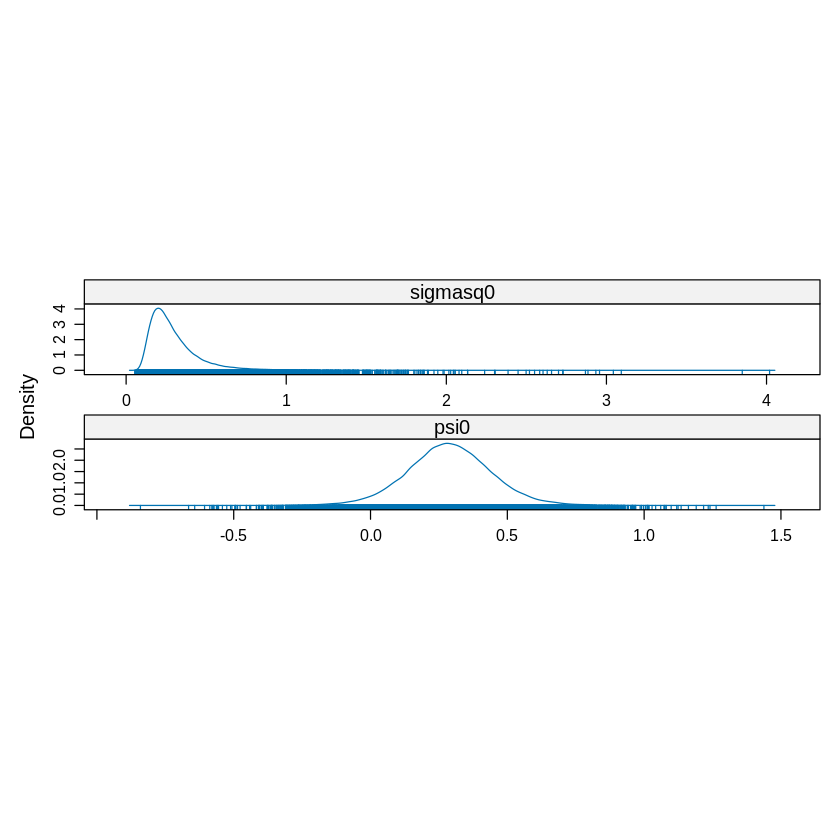

In [122]:
require(lattice)
densityplot(iterations[,c("psi0","sigmasq0")])

A posterior numerical summary can be seen in the data frame below.

In [123]:
posterior.expected.vals <- c(psi0_mean, sigmasq0_mean)
posterior.sds <- c(psi0_sd, sigmasq0_sd)
confidence.interval <- rbind(psi0_CI, sigmasq0_CI)

In [124]:
summ = data.frame(posterior.expected.vals, posterior.sds, confidence.interval)
row.names(summ) <- c('psi0','sigmasq0')
colnames(summ) <-c ('posterior.expected.vals','posterior.sds','95%confidence.interval.left','95%confidence.interval.right')

In [125]:
summ

,posterior.expected.vals,posterior.sds,95%confidence.interval.left,95%confidence.interval.right
,<dbl>,<dbl>,<named list>,<named list>
psi0,0.2873474,0.1575065,0.2863712,0.2883236
sigmasq0,0.2975855,0.1692241,0.2965367,0.2986344


(f) Suppose a new case-control study is to be performed, and assume that its log-odds standard error (new σ) will be 0.125. Assume the ψ for the new study is exchangeable with those for the previous studies (under the Bayesian model).


Use at least 10,000 iterations of burn-in, and 100,000 for inference as before.

[i] Re-draw your DAG, adding new nodes to represent the new $\hat{ψ}$ and new ψ.

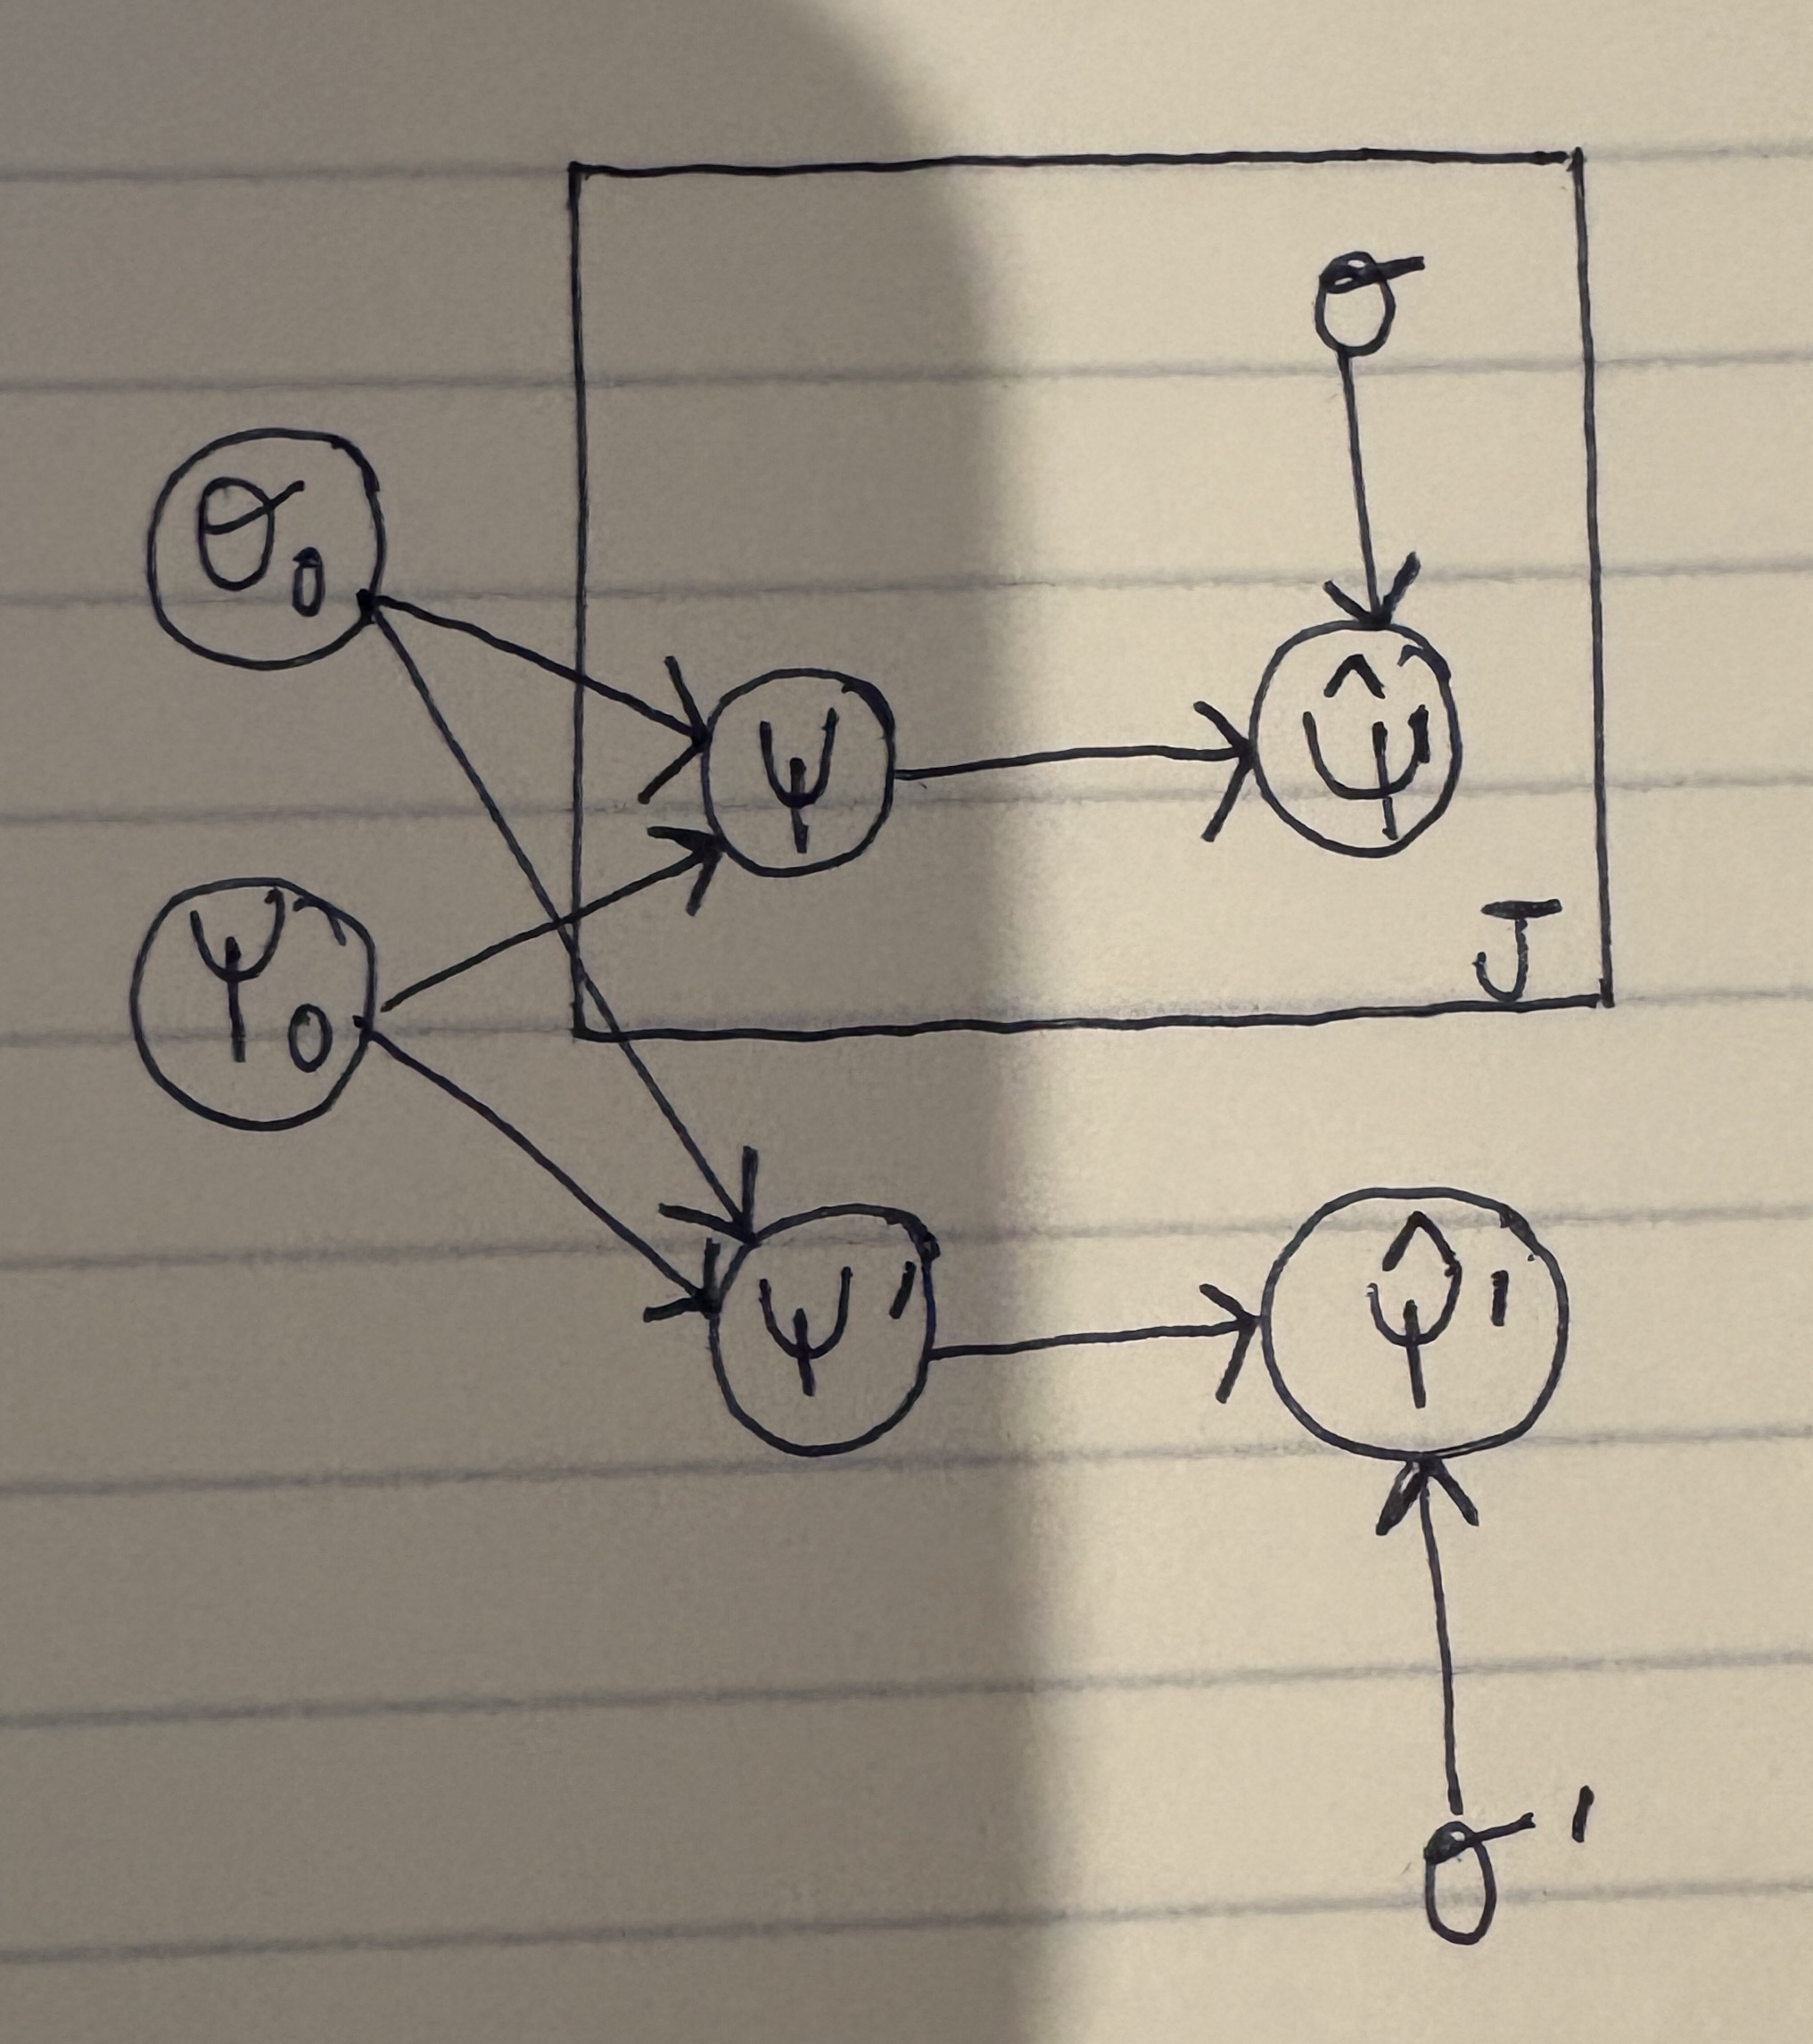

[ii] s] Correspondingly modify your JAGS model to answer the following parts.
Show the modified JAGS and R code and output that you used.

The updated JAGS model is as follows:

In [126]:
'
model {
  for (j in 1:12) {
    psihat[j] ~ dnorm(psi[j], 1/sigma[j]^2)
    psi[j] ~ dnorm(psi0, 1/sigma0^2)
  }

  psi_new ~ dnorm(psi0, 1/sigma0^2)
  psihat_new ~ dnorm(psi_new,1/sigma_new^2)
  sigma_new <- 0.2
  sigma_newsq <- sigma_new^2
  psi0 ~ dnorm(0,1/1000^2)
  sigma0 ~ dunif(0,1000)

  sigmasq0 <- sigma0^2
}
'

[1] "\nmodel {\n  for (j in 1:12) {\n    psihat[j] ~ dnorm(psi[j], 1/sigma[j]^2)\n    psi[j] ~ dnorm(psi0, 1/sigma0^2)\n  }\n\n  psi_new ~ dnorm(psi0, 1/sigma0^2)\n  psihat_new ~ dnorm(psi_new,1/sigma_new^2)\n  sigma_new <- 0.2\n  sigma_newsq <- sigma_new^2\n  psi0 ~ dnorm(0,1/1000^2)\n  sigma0 ~ dunif(0,1000)\n\n  sigmasq0 <- sigma0^2\n}\n"

In [127]:
model2 <- jags.model("filledtemplate2.bug", data)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 12
   Unobserved stochastic nodes: 16
   Total graph size: 75

Initializing model



In [128]:
update(model2, 10000)

In [129]:
iterations2 <- coda.samples(model2, c("psi_new","psihat_new"), n.iter=100000)

[iii] Approximate the posterior mean and posterior standard deviation, and
form an approximate 95% central posterior predictive interval for the estimated
log-odds ratio that the new study will obtain. (Remember, this new estimated
log-odds ratio will be the new $\hat{ψ}$, not the new ψ).

In [130]:
psi_new<-as.matrix(iterations2)[,"psi_new"]
psihat_new<-as.matrix(iterations2)[,"psihat_new"]

In [131]:
summary(psi_new)
summary(psihat_new)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.43233 -0.06637  0.28852  0.28817  0.64505  4.49290 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.55158 -0.09672  0.28734  0.28674  0.66936  4.82221 

In [132]:
psihat_mean_new <- mean(psihat_new)
psihat_sd_new <- sd(psihat_new)

The posterior mean is approximately 0.2878.

In [133]:
psihat_mean_new

[1] 0.2867389

The posterior standard deviation is approximately 0.6029.

In [134]:
psihat_sd_new

[1] 0.6020833

In [135]:
psihat_confidence_interval_new = confidenceintervalhelper(100000, psihat_sd_new, psihat_mean_new)

The 95% central posterior predictive interval is approximately (0.2841, 0.2916).

In [136]:
psihat_confidence_interval_new

[[1]]
[1] 0.2830072

[[2]]
[1] 0.2904706

[iv] Approximate the posterior predictive probability that the new estimated
log-odds ratio will be at least twice its standard error, i.e., at least two standard errors (2σ) greater than zero. (This is roughly the posterior probability that the new study will find a statistically significant result, and in the positive direction.) Suggestion: Add an indicator variable to your JAGS model - one that equals 1 when the event occurs, and 0 otherwise. (What is its mean?)

In [137]:
pos_twox_sigma <- (psihat_mean_new + psihat_sd_new) * 2
neg_twox_sigma <- (psihat_mean_new - psihat_sd_new) * 2

In [138]:
sigma_count <- 0
x <- c(1:100000)
for (i in x){
    if((psihat_new[i] > pos_twox_sigma) | (psihat_new[i] < neg_twox_sigma)) {
      sigma_count = sigma_count + 1
    }
}

In [139]:
post_pred_prob <- sigma_count / 100000

The posterior predictive probability that the new estimated log-odds ratio will be at least twice its standard error is approximately 0.0701.

In [140]:
post_pred_prob

[1] 0.0692